In [ ]:
# COVID-19 Disease Outbreak Trend Analysis (EDA)

*Objective:
To perform exploratory data analysis on global COVID-19 outbreak data to understand spread dynamics, peak periods, growth trends and regional disparities using Python.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')


In [ ]:
## Dataset Overview

- Source: Kaggle – COVID-19 Clean Complete Dataset
- Granularity: Daily, Country-level
- Key Columns:
  - Date
  - Country/Region
  - Confirmed
  - Deaths
  - Recovered

This dataset captures the daily progression of COVID-19 cases across countries and is suitable for time-series outbreak analysis.


In [6]:
import pandas as pd

file_path = r"C:\Users\JIJO\Downloads\Covid 19 EDA Python project\covid_19_Data.csv"
df = pd.read_csv(file_path)

df.head()
df['Date'] = pd.to_datetime(df['Date'])

global_trend = df.groupby('Date')['Confirmed'].sum()

In [ ]:
# Initial Data Inspection

Before analysis, The dataset structure was inspected, data types, and completeness to ensure reliability of results.


In [6]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [ ]:
# Data Preparation

The Date column is converted to datetime format to enable time-series analysis.


In [7]:
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
## Q1: How did the global COVID-19 outbreak evolve over time?


In [8]:
global_trend = df.groupby('Date')['Confirmed'].sum()


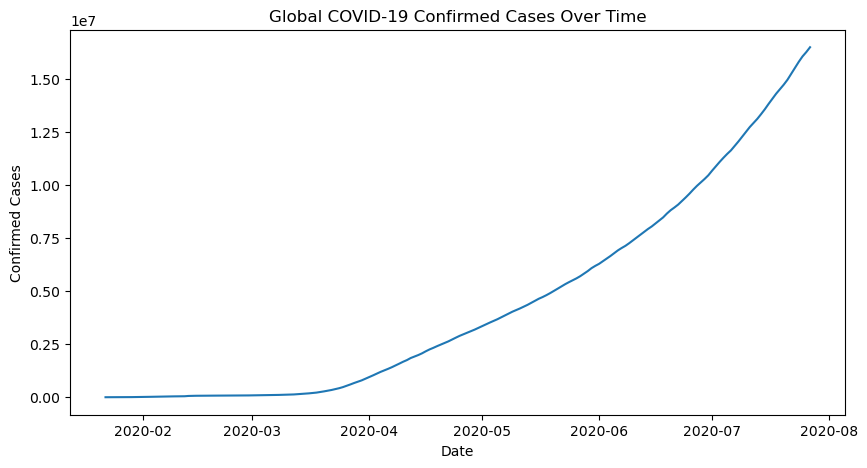

In [9]:
plt.figure(figsize=(10,5))
plt.plot(global_trend)
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Global COVID-19 Confirmed Cases Over Time')
plt.show()


In [ ]:
### Insight
The global outbreak shows a sharp acceleration phase followed by periods of stabilization, indicating distinct outbreak waves.


In [ ]:
## Q2: Which countries were most affected by COVID-19?


In [4]:
top_countries = (
    df.groupby('Country/Region')['Confirmed']
      .max()
      .sort_values(ascending=False)
      .head(10)
)

top_countries


Country/Region
US                4290259
Brazil            2442375
India             1480073
Russia             816680
South Africa       452529
Mexico             395489
Peru               389717
Chile              347923
United Kingdom     300111
Iran               293606
Name: Confirmed, dtype: int64

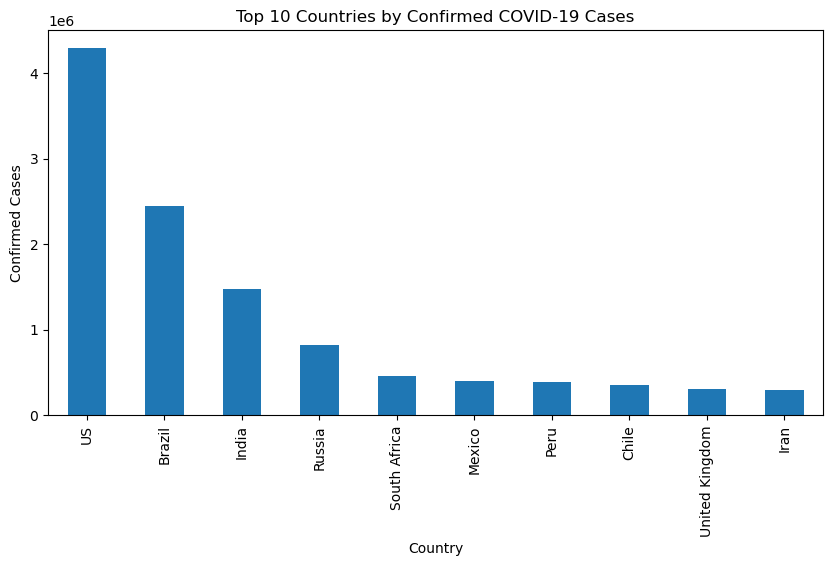

In [7]:
top_countries.plot(kind='bar', figsize=(10,5))
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.show()


In [ ]:
### Insight
A small number of countries account for a disproportionately large share of global confirmed cases.


In [ ]:
## Q3: How did outbreak growth rates change across phases?


In [7]:
growth_rate = global_trend.pct_change() * 100
moving_avg = global_trend.rolling(window=7).mean()


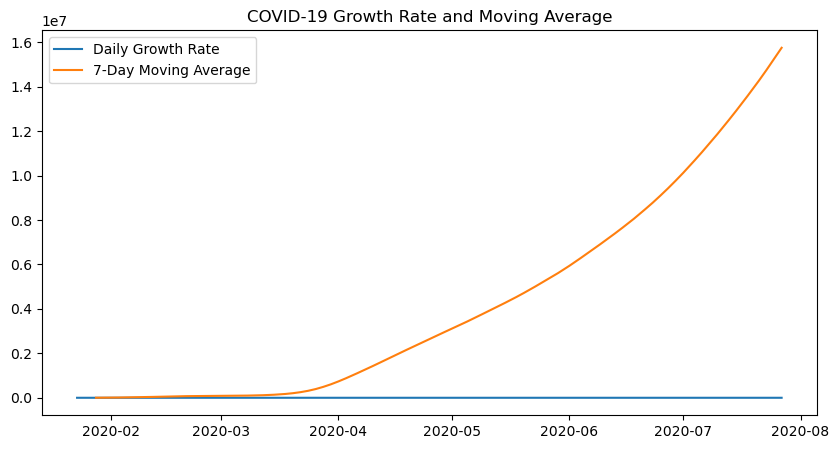

In [8]:
plt.figure(figsize=(10,5))
plt.plot(growth_rate, label='Daily Growth Rate')
plt.plot(moving_avg, label='7-Day Moving Average')
plt.legend()
plt.title('COVID-19 Growth Rate and Moving Average')
plt.show()


In [ ]:
### Insight
Growth rates declined significantly after peak periods, suggesting the impact of public health interventions.


In [ ]:
## Q4: When did peak outbreak periods occur globally?


In [9]:
peak_date = global_trend.idxmax()
peak_cases = global_trend.max()

peak_date, peak_cases


(Timestamp('2020-07-27 00:00:00'), 16480485)

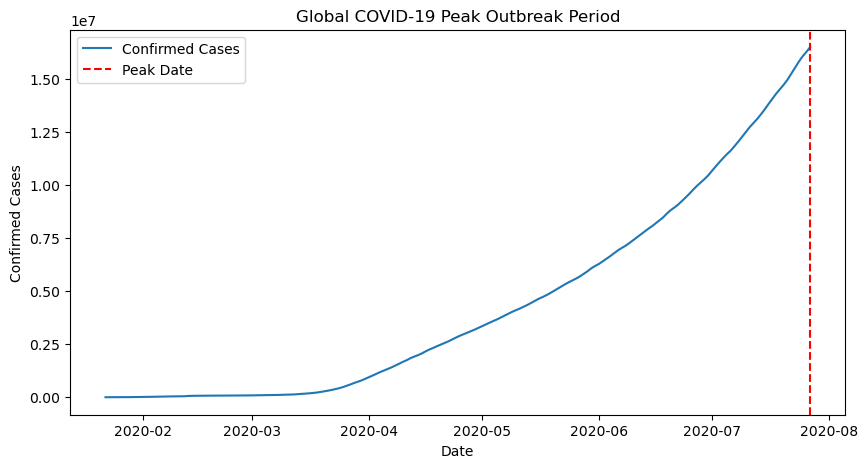

In [10]:
plt.figure(figsize=(10,5))
plt.plot(global_trend, label='Confirmed Cases')
plt.axvline(peak_date, color='red', linestyle='--', label='Peak Date')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Global COVID-19 Peak Outbreak Period')
plt.legend()
plt.show()


In [ ]:
### Insight
The global COVID-19 outbreak reached its peak during a specific period, indicating the highest strain on healthcare systems worldwide.


In [ ]:
## Q5: How severe was the outbreak in terms of deaths relative to confirmed cases?


In [11]:
country_severity = (
    df.groupby('Country/Region')[['Confirmed', 'Deaths']]
    .max()
)

country_severity['Death_Rate'] = (
    country_severity['Deaths'] / country_severity['Confirmed']
)

top_severe = country_severity.sort_values(
    by='Death_Rate', ascending=False
).head(10)

top_severe


,Confirmed,Deaths,Death_Rate
Country/Region,,,
Yemen,1691,483,0.285630
United Kingdom,300111,45759,0.152474
Belgium,66428,9822,0.147859
France,208665,30096,0.144231
Italy,246286,35112,0.142566
Hungary,4448,596,0.133993
Netherlands,53151,6141,0.115539
Mexico,395489,44022,0.111310
Spain,272421,28752,0.105543


In [ ]:
### Insight
While some countries recorded high confirmed cases, others exhibited higher death rates, highlighting differences in outbreak severity and healthcare response.


In [ ]:
## Conclusion

This exploratory analysis highlights how COVID-19 spread over time, identified major outbreak peaks, and revealed regional disparities.  
The findings demonstrate the value of Python-based EDA in supporting public health decision-making and outbreak monitoring.
